In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso

In [2]:
X=pd.read_csv('train.csv')
y=X.Hardness
X=X.drop("Hardness",axis=1)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=None)

In [3]:
#X_train=pd.read_csv('train.csv')
#X_test=pd.read_csv('test.csv')
#y_train=X_train.Hardness

In [4]:
X_train

,id,allelectrons_Total,density_Total,allelectrons_Average,val_e_Average,atomicweight_Average,ionenergy_Average,el_neg_chi_Average,R_vdw_element_Average,R_cov_element_Average,zaratio_Average,density_Average
2200,2200,60.0,8.511159,7.565217,4.521739,15.421670,11.494264,2.749565,1.615652,0.785217,0.494115,0.76176
8911,8911,403.0,35.701392,11.363636,4.363636,23.266858,11.014615,2.674545,1.766364,0.885682,0.498702,1.03590
1430,1430,60.0,5.625328,10.000000,4.800000,20.322036,10.629000,2.755000,1.620000,0.815000,0.499540,0.91543
2853,2853,75.0,10.252123,10.000000,4.571429,22.406561,11.173014,2.764286,1.769286,0.928571,0.481661,1.86481
2495,2495,182.0,20.855328,20.333333,4.666667,46.520353,11.408267,2.743333,1.761667,0.966667,0.483602,2.16486
...,...,...,...,...,...,...,...,...,...,...,...,...
2198,2198,233.0,34.091384,28.857143,5.000000,67.440898,11.435667,2.775238,1.702381,0.926000,0.468993,3.56717
9488,9488,36.0,0.864995,18.000000,4.000000,37.272150,8.213150,1.790000,2.040000,1.390000,0.478990,0.45291
1913,1913,63.0,13.890000,12.600000,4.800000,25.023328,10.131440,2.352000,1.907200,0.828000,0.482265,1.56776
5340,5340,108.0,8.147992,10.000000,4.800000,20.298893,10.913690,2.675000,1.736000,0.925000,0.491110,0.96381


In [5]:
X_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,7284.0,5186.013454,3010.709184,1.0,2558.750000,5179.000000,7771.250000,10406.000000
allelectrons_Total,7284.0,126.975254,178.277645,0.0,66.000000,100.000000,131.000000,9852.000000
density_Total,7284.0,14.418989,14.909170,0.0,7.558488,10.584328,16.619320,236.459656
allelectrons_Average,7284.0,17.018689,10.411647,0.0,10.000000,12.600000,22.000000,67.000000
val_e_Average,7284.0,4.548560,0.681172,0.0,4.000000,4.716117,4.800000,6.000000
atomicweight_Average,7284.0,37.488140,25.965528,0.0,20.298893,26.203827,48.719500,167.400000
ionenergy_Average,7284.0,10.933296,1.374045,0.0,10.565180,11.202760,11.660488,15.245810
el_neg_chi_Average,7284.0,2.605726,0.327559,0.0,2.528333,2.706000,2.805000,3.443000
R_vdw_element_Average,7284.0,1.733406,0.187107,0.0,1.672500,1.734167,1.813333,2.250000
R_cov_element_Average,7284.0,0.945302,0.179035,0.0,0.864000,0.916667,0.982500,1.615840


In [6]:
X_train,X_test=X_train.drop('id',axis=1),X_test.drop('id',axis=1)

In [7]:
data=pd.read_csv('train.csv')

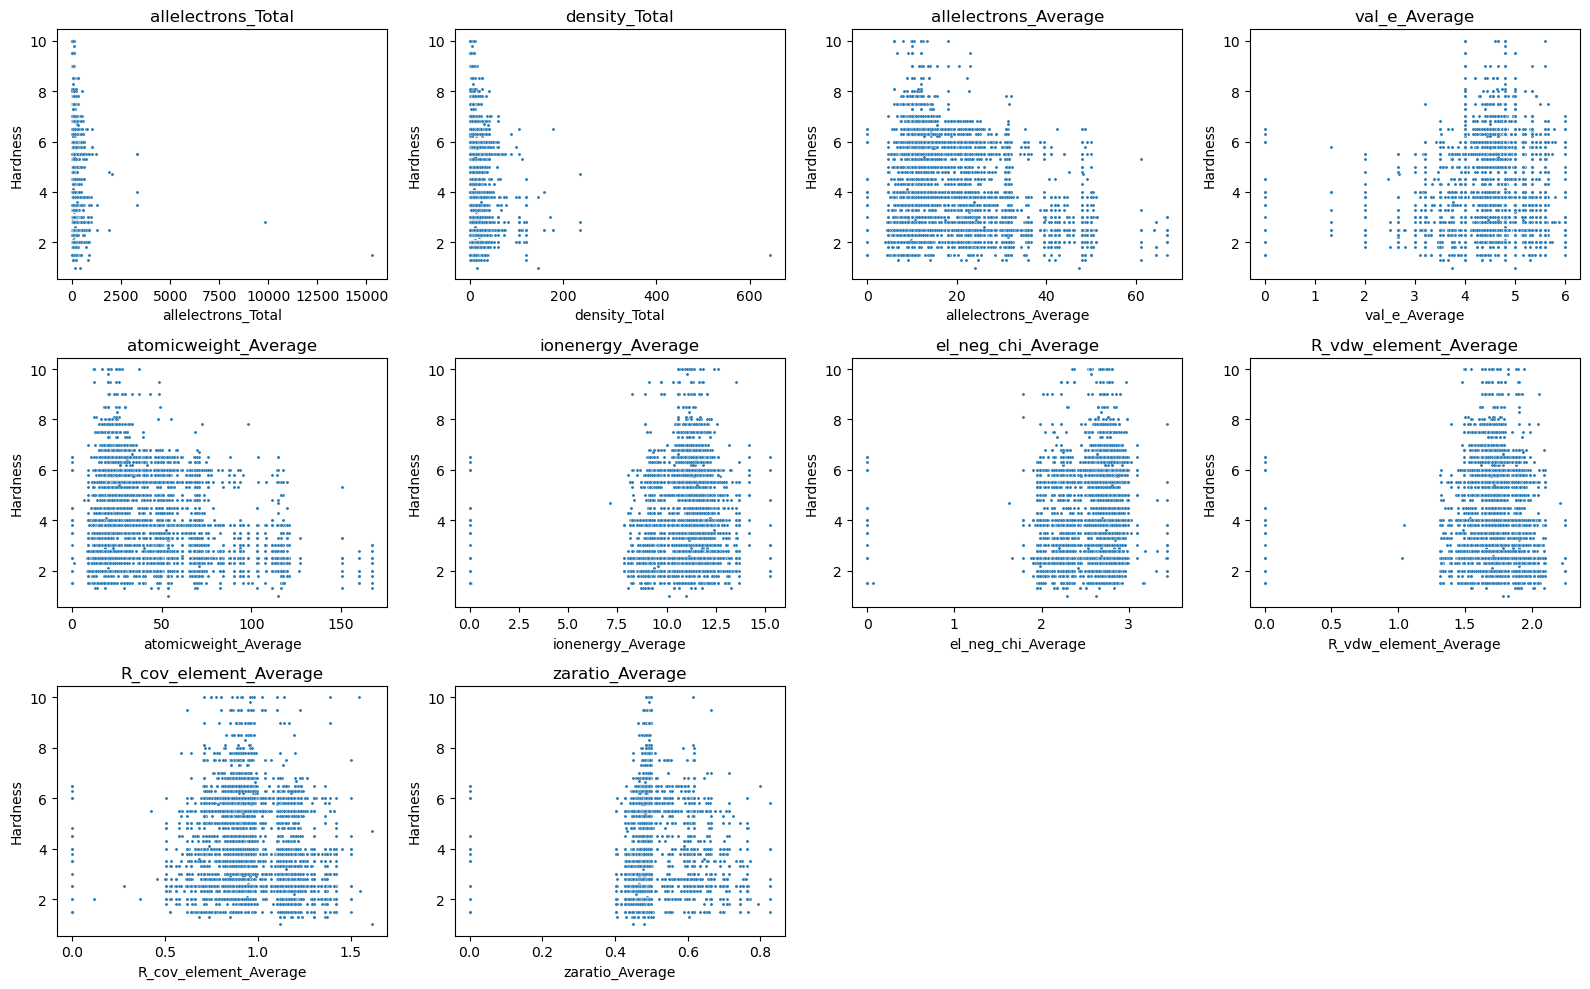

In [8]:
# fig, axs = plt.subplots(3,4)
fig = plt.figure(figsize = (16, 10))
i = 1
for label in data.drop(columns=['id']).columns[:-2]:
    plt.subplot(3, 4, i)
    sns.scatterplot(data, x=label, y="Hardness", s=5)
    plt.title(label)
    i += 1
plt.tight_layout()
plt.show()


In [86]:
lr=LinearRegression(fit_intercept=True)
lr_model=lr.fit(X_train,y_train)
lr_pred=lr_model.predict(X_test)

In [87]:
lr.score(X_test,y_test)

0.2223967983507441

In [88]:
print(pd.DataFrame(lr.coef_,X_test.columns))

                              0
allelectrons_Total    -0.000207
density_Total         -0.000574
allelectrons_Average  -0.045201
val_e_Average          0.037736
atomicweight_Average  -0.010273
ionenergy_Average     -0.118888
el_neg_chi_Average     1.086205
R_vdw_element_Average  2.272045
R_cov_element_Average -0.654790
zaratio_Average       -4.725937
density_Average       -0.091170


In [89]:
acc=mean_squared_error(lr_pred,y_test)
acc

2.2418861053043515